## Google Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ingest and Basic Exploration

In [2]:
from create_spark import CreateSparkSession

spark_obj = CreateSparkSession()
spark = spark_obj.session

23/09/26 00:21:34 WARN Utils: Your hostname, Wonseoks-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.35.161 instead (on interface en0)
23/09/26 00:21:34 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/wonseokchoi/.ivy2/cache
The jars for the packages stored in: /Users/wonseokchoi/.ivy2/jars
com.amazonaws#aws-java-sdk added as a dependency
org.apache.hadoop#hadoop-aws added as a dependency
io.delta#delta-core_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-7b280bc0-c24f-4058-ad9e-22f53ef2393c;1.0
	confs: [default]


:: loading settings :: url = jar:file:/Users/wonseokchoi/Documents/Installs/spark-3.4.1-bin-hadoop3/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found com.amazonaws#aws-java-sdk;1.11.563 in central
	found com.amazonaws#aws-java-sdk-ioteventsdata;1.11.563 in central
	found com.amazonaws#aws-java-sdk-core;1.11.563 in central
	found commons-logging#commons-logging;1.1.3 in central
	found org.apache.httpcomponents#httpclient;4.5.5 in central
	found org.apache.httpcomponents#httpcore;4.4.9 in central
	found commons-codec#commons-codec;1.10 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found com.fasterxml.jackson.core#jackson-databind;2.6.7.2 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.6.0 in central
	found com.fasterxml.jackson.core#jackson-core;2.6.7 in central
	found com.fasterxml.jackson.dataformat#jackson-dataformat-cbor;2.6.7 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.11.563 in central
	found com.amazonaws#aws-java-sdk-iotevents;1.11.563 in central
	found com.amazonaws#aws-java-sdk-iotthingsgraph;1.11.563 in central
	found com.amazonaws#

In [3]:
DF = spark.read.format('delta').load("s3://wonseokchoi-data-lake-project/lake/cleaned/price_cleaned/TSLA/")
df = DF.toPandas()
df.describe()

,close,high,low,open,transactions,volume,volume_weighted
count,930432.000000,930432.000000,930432.000000,930432.000000,930431.000000,908624.000000,930431.000000
mean,169.980066,170.099863,169.861133,169.981018,907.655254,146711.309156,169.484220
std,107.993261,108.063729,107.923123,107.993778,1637.136340,193291.131591,107.990294
min,11.811300,11.819000,11.799500,11.812700,1.000000,0.000000,11.000000
25%,49.232000,49.297825,49.168000,49.231300,63.000000,6099.000000,49.000000
50%,194.020000,194.190000,193.880000,194.030000,230.000000,65130.000000,194.000000
75%,252.100000,252.260825,251.933300,252.100000,1143.000000,219412.250000,252.000000
max,415.300000,416.666700,415.000000,415.516700,56621.000000,999999.000000,415.000000


In [4]:
df.shape

(930432, 9)

In [5]:
df.isnull().any()

symbol             False
timestamp          False
close              False
high               False
low                False
open               False
transactions        True
volume              True
volume_weighted     True
dtype: bool

### Basic Plot Explorations

In [6]:
df.set_index("timestamp", inplace=True)
df.head()

,symbol,close,high,low,open,transactions,volume,volume_weighted
timestamp,,,,,,,,
2018-09-06 17:00:00,TSLA,18.8300,18.8300,18.8300,18.8300,5.0,3015.0,18.0
2018-09-06 17:29:00,TSLA,18.9633,18.9633,18.9633,18.9633,6.0,6000.0,18.0
2018-09-06 17:34:00,TSLA,18.9920,18.9920,18.9760,18.9760,13.0,8850.0,18.0
2018-09-06 17:41:00,TSLA,18.9400,18.9400,18.9400,18.9400,2.0,2100.0,18.0
2018-09-06 17:44:00,TSLA,18.9667,18.9667,18.9667,18.9667,1.0,1500.0,18.0


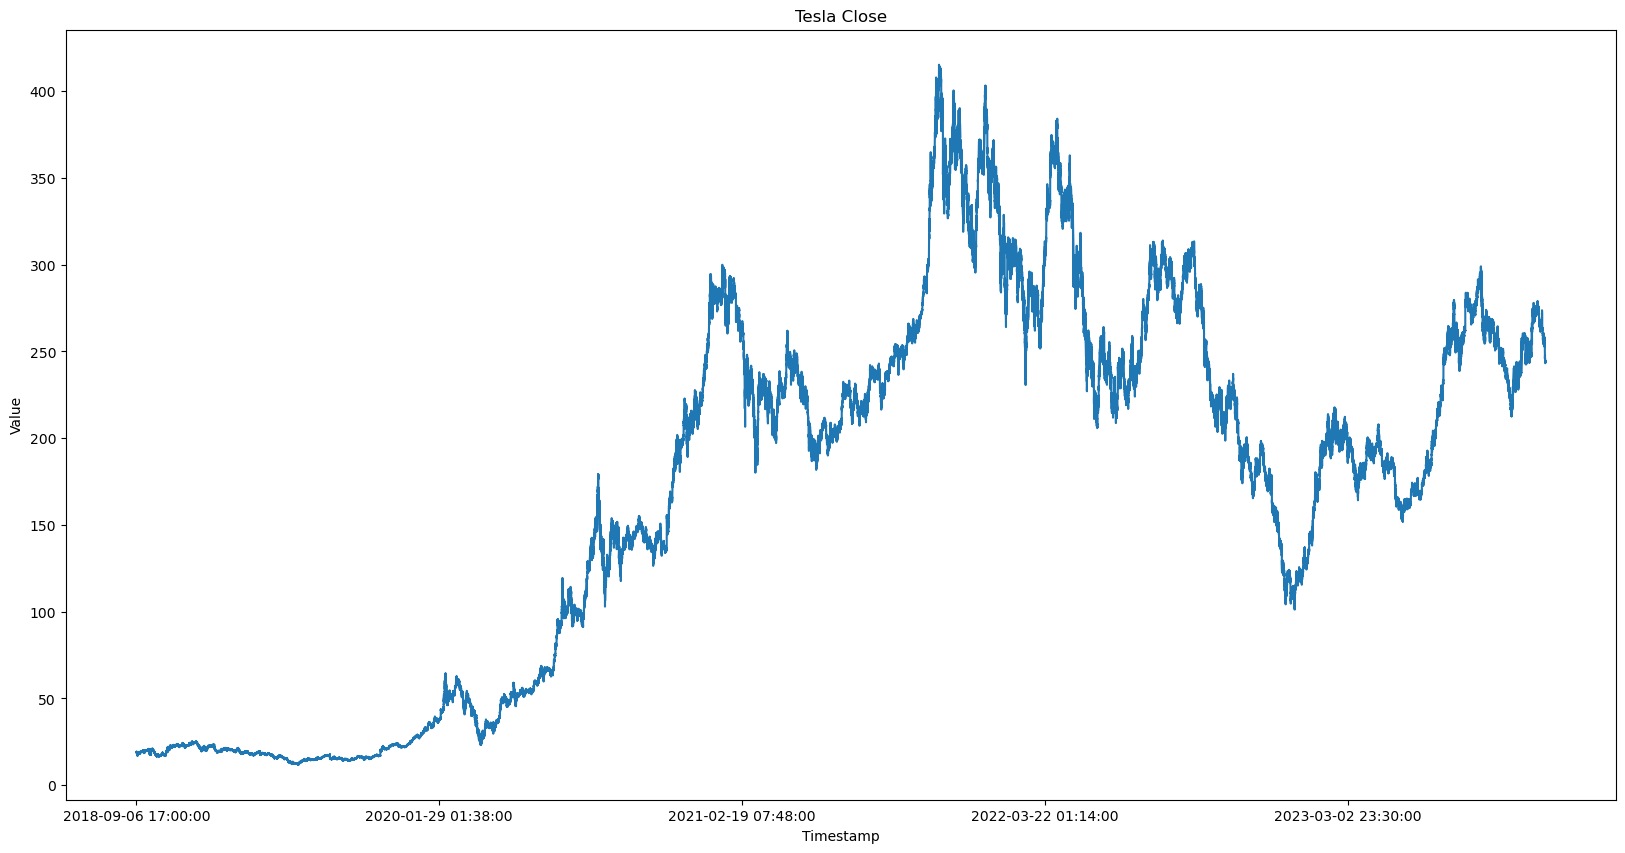

In [7]:
df['close'].plot(kind='line', figsize=(20, 10))
plt.title('Tesla Close')
plt.ylabel('Value')
plt.xlabel('Timestamp')
plt.show()

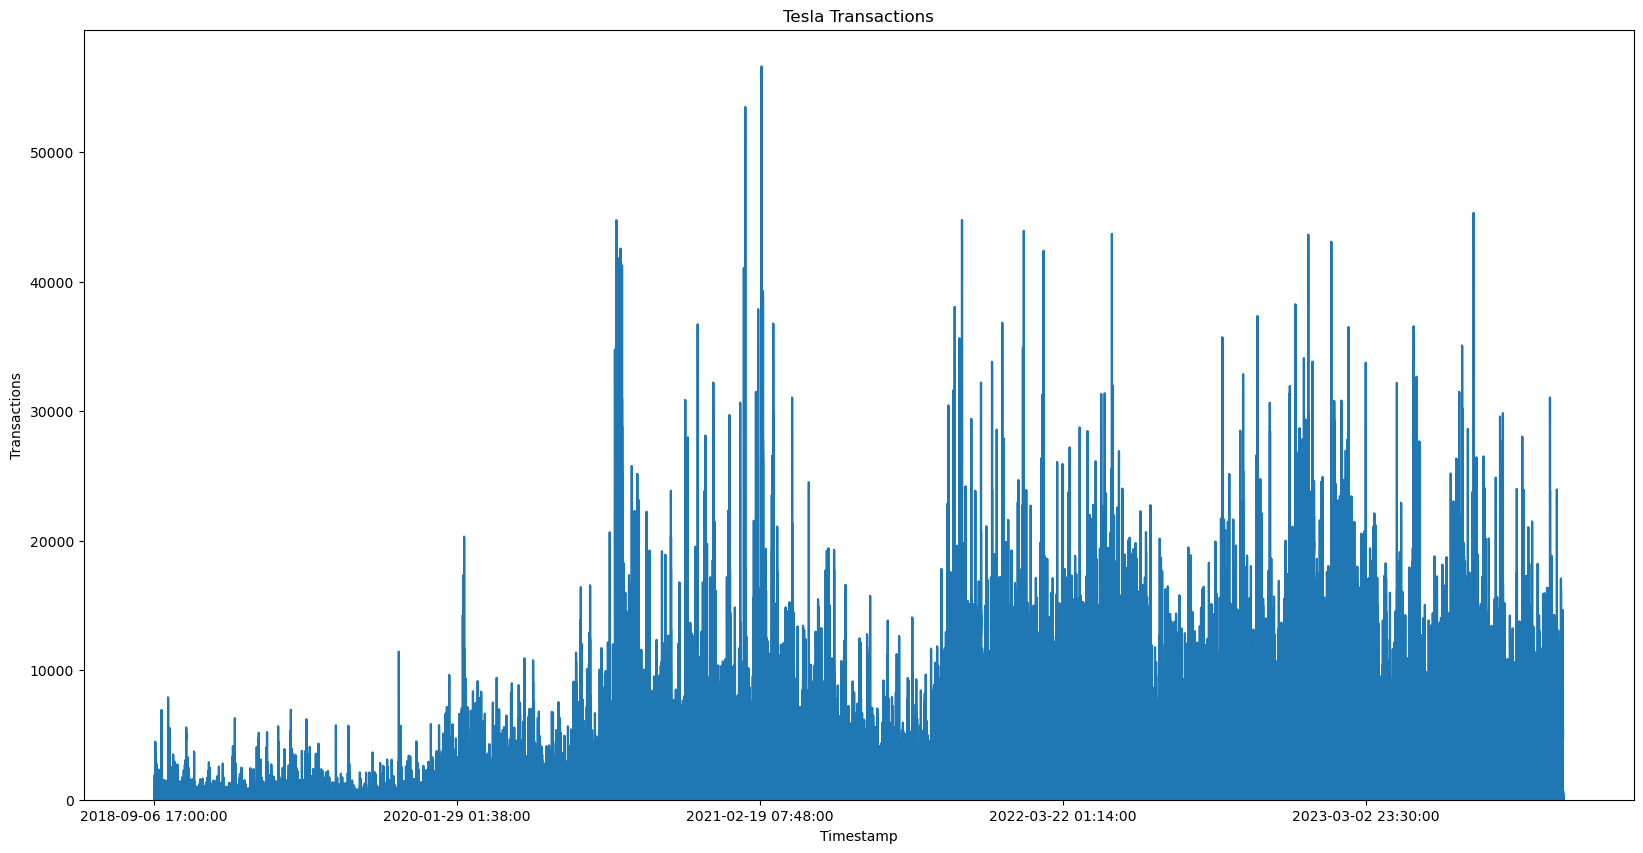

In [8]:
df['transactions'].plot(kind='area', stacked=True, figsize=(20, 10))
plt.title('Tesla Transactions')
plt.ylabel('Transactions')
plt.xlabel('Timestamp')
plt.show()

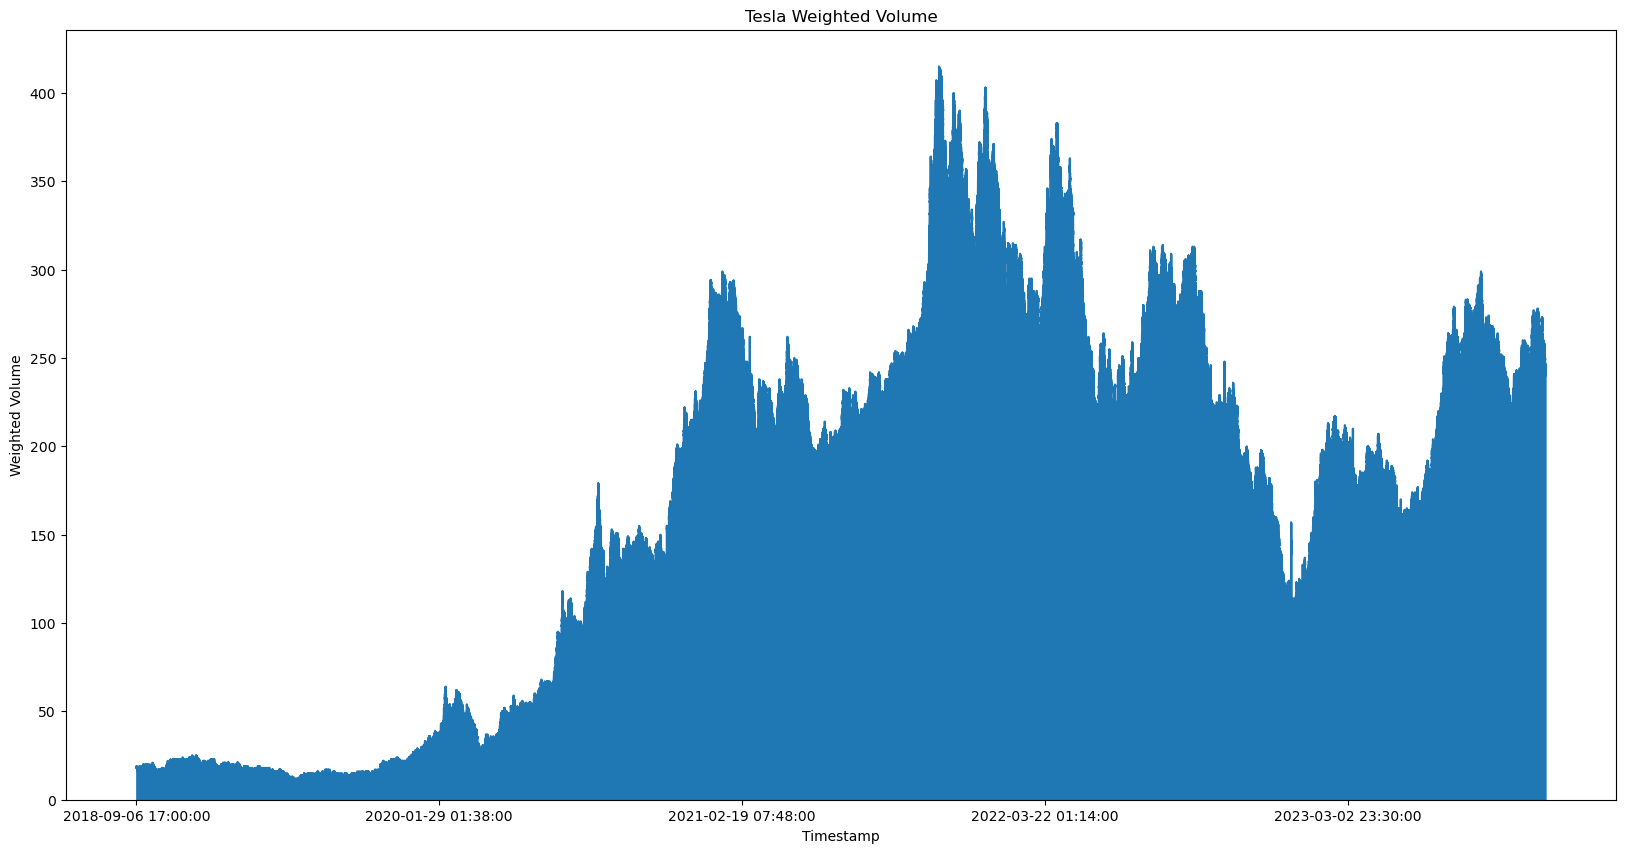

In [9]:
df['volume_weighted'].plot(kind='area', stacked=True, figsize=(20, 10))
plt.title('Tesla Weighted Volume')
plt.ylabel('Weighted Volume')
plt.xlabel('Timestamp')
plt.show()

### Statistics Exploration

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Mean over Time')

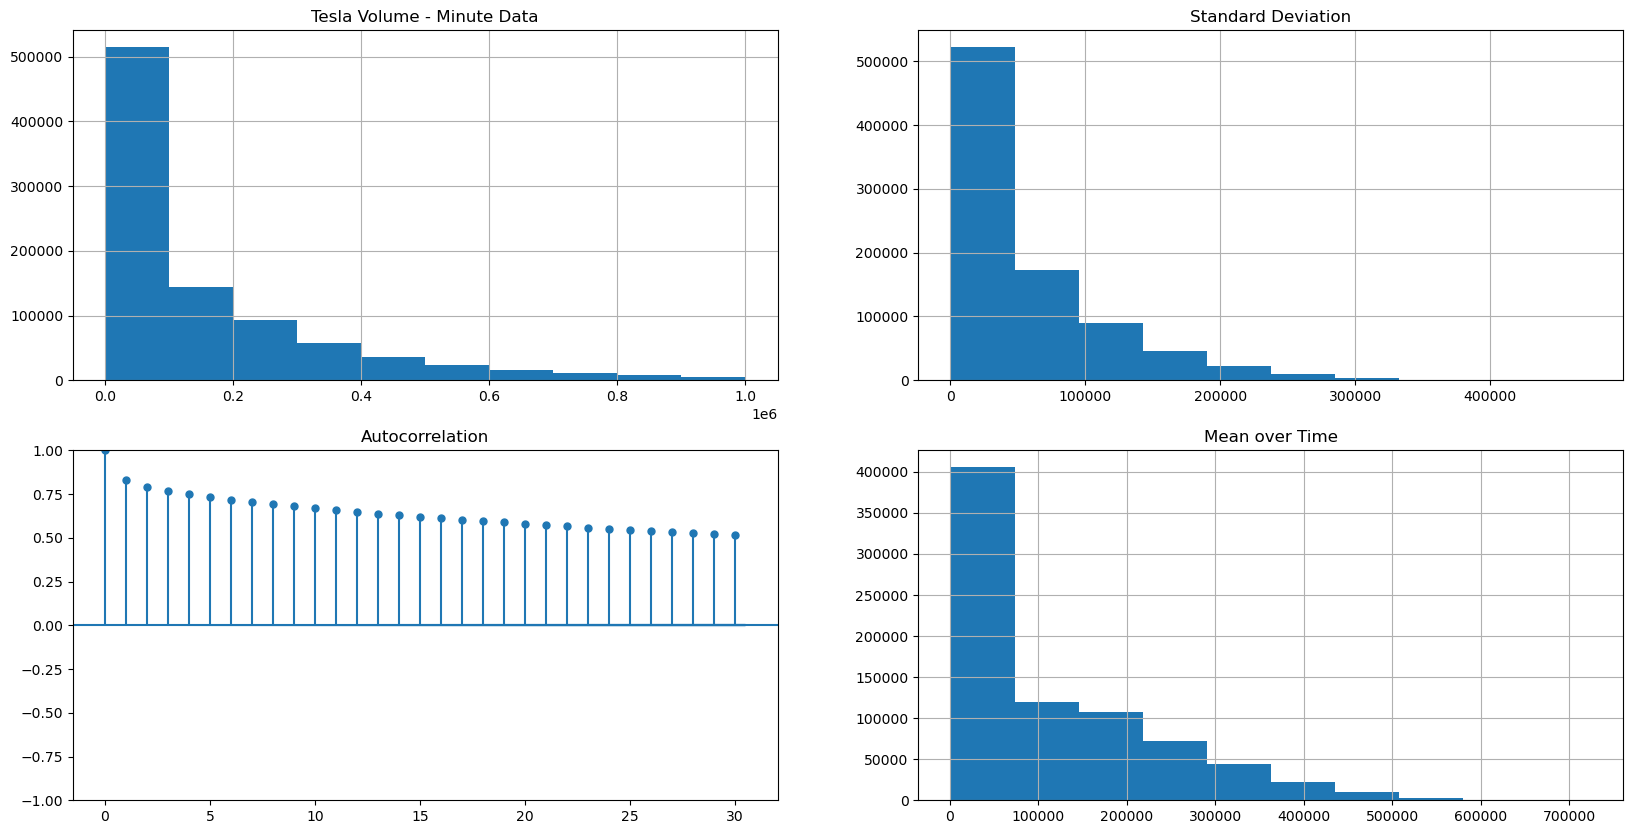

In [11]:
fig = plt.figure(figsize=(20,10))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df.volume.hist(ax=hist_ax)
hist_ax.set_title('Tesla Volume - Minute Data')

series = df['volume'].dropna()

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title('Autocorrelation')

mm = df.volume.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title('Standard Deviation')

mm = df.volume.rolling(30).mean()
mm.hist(ax=mean_ax)
mean_ax.set_title('Mean over Time')

### Stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

# X = df['volume'].dropna().values
# result = adfuller(X)

Unfortunately ADF computation crashed as we are dealing with a large dataset for off the shelf Pandas to process.
As Spark unfortunately does not to my knoweledge offer off-the-shelf ADF testing functions, we will use random sampling as a proxy guide.

In [13]:
def run_adf_on_samples(df, column_name, n_samples, sample_fraction, random_seed=None):
    adf_results = []
    
    for i in range(n_samples):
        # Generate a random sample
        sample_df = df[column_name].dropna().sample(frac=sample_fraction, random_state=random_seed)
        
        # Run the ADF test
        result = adfuller(sample_df)
        
        # Store the result
        adf_results.append({
            'Sample': i + 1,
            'ADF_Statistic': result[0],
            'p-value': "{:.10f}".format(result[1]),
            'Critical_Values': result[4]
        })
        
        print(f"Completed ADF test for sample {i + 1}")

    return adf_results

adf_results = run_adf_on_samples(df, 'volume', 5, 0.1)

Completed ADF test for sample 1
Completed ADF test for sample 2
Completed ADF test for sample 3
Completed ADF test for sample 4
Completed ADF test for sample 5


In [14]:
for res in adf_results:
    print(f"\nSample {res['Sample']}")
    print(f"ADF Statistic: {res['ADF_Statistic']}")
    print(f"p-value: {res['p-value']}")
    print("Critical Values:")
    for key, value in res['Critical_Values'].items():
        print(f"\t{key}: {value}")


Sample 1
ADF Statistic: -151.98994258823484
p-value: 0.0000000000
Critical Values:
	1%: -3.430421974782181
	5%: -2.8615718116908258
	10%: -2.566786932256008

Sample 2
ADF Statistic: -301.5451231701289
p-value: 0.0000000000
Critical Values:
	1%: -3.4304219724056892
	5%: -2.8615718106404677
	10%: -2.5667869316969365

Sample 3
ADF Statistic: -300.253760086143
p-value: 0.0000000000
Critical Values:
	1%: -3.4304219724056892
	5%: -2.8615718106404677
	10%: -2.5667869316969365

Sample 4
ADF Statistic: -302.3454057047234
p-value: 0.0000000000
Critical Values:
	1%: -3.4304219724056892
	5%: -2.8615718106404677
	10%: -2.5667869316969365

Sample 5
ADF Statistic: -300.4750714271644
p-value: 0.0000000000
Critical Values:
	1%: -3.4304219724056892
	5%: -2.8615718106404677
	10%: -2.5667869316969365


Fortunately seems stationary (by using an average as proxy) so no additional methods needed to achieve it